<h3> Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

import warnings
warnings.filterwarnings('ignore')

from Classifier import Classifier

<h3> Loading Data

In [2]:
df_cluster = pd.read_csv('../../data/(K) clustered_data_analytical.csv', index_col=0)

<h3> Classification

In [3]:
models = {
    "LR": Classifier("Logistic Regression", df_cluster),
    "RF": Classifier("Random Forest", df_cluster),
    "LGBM": Classifier("Light Gradient-Boosting Machine", df_cluster)
}

results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-score": [],
    "Overfitting": []
}

for key, model in models.items():
    results["Model"].append(model.name)
    results["Accuracy"].append(model.accuracy)
    results["Precision"].append(model.precision)
    results["Recall"].append(model.recall)
    results["F1-score"].append(model.f1)
    results["Overfitting"].append(model.overfit)

df_results = pd.DataFrame(results)
df_results

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 338
[LightGBM] [Info] Number of data points in the train set: 6353, number of used features: 17
[LightGBM] [Info] Start training from score -1.399764
[LightGBM] [Info] Start training from score -1.375181
[LightGBM] [Info] Start training from score -1.406809
[LightGBM] [Info] Start training from score -1.364035
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

,Model,Accuracy,Precision,Recall,F1-score,Overfitting
0,Logistic Regression,0.938303,0.938692,0.938303,0.938411,False
1,Random Forest,0.999633,0.999633,0.999633,0.999633,False
2,Light Gradient-Boosting Machine,0.995960,0.995970,0.995960,0.995960,False


-> Optimal Classifier: Random Forest

<h3> SHAP

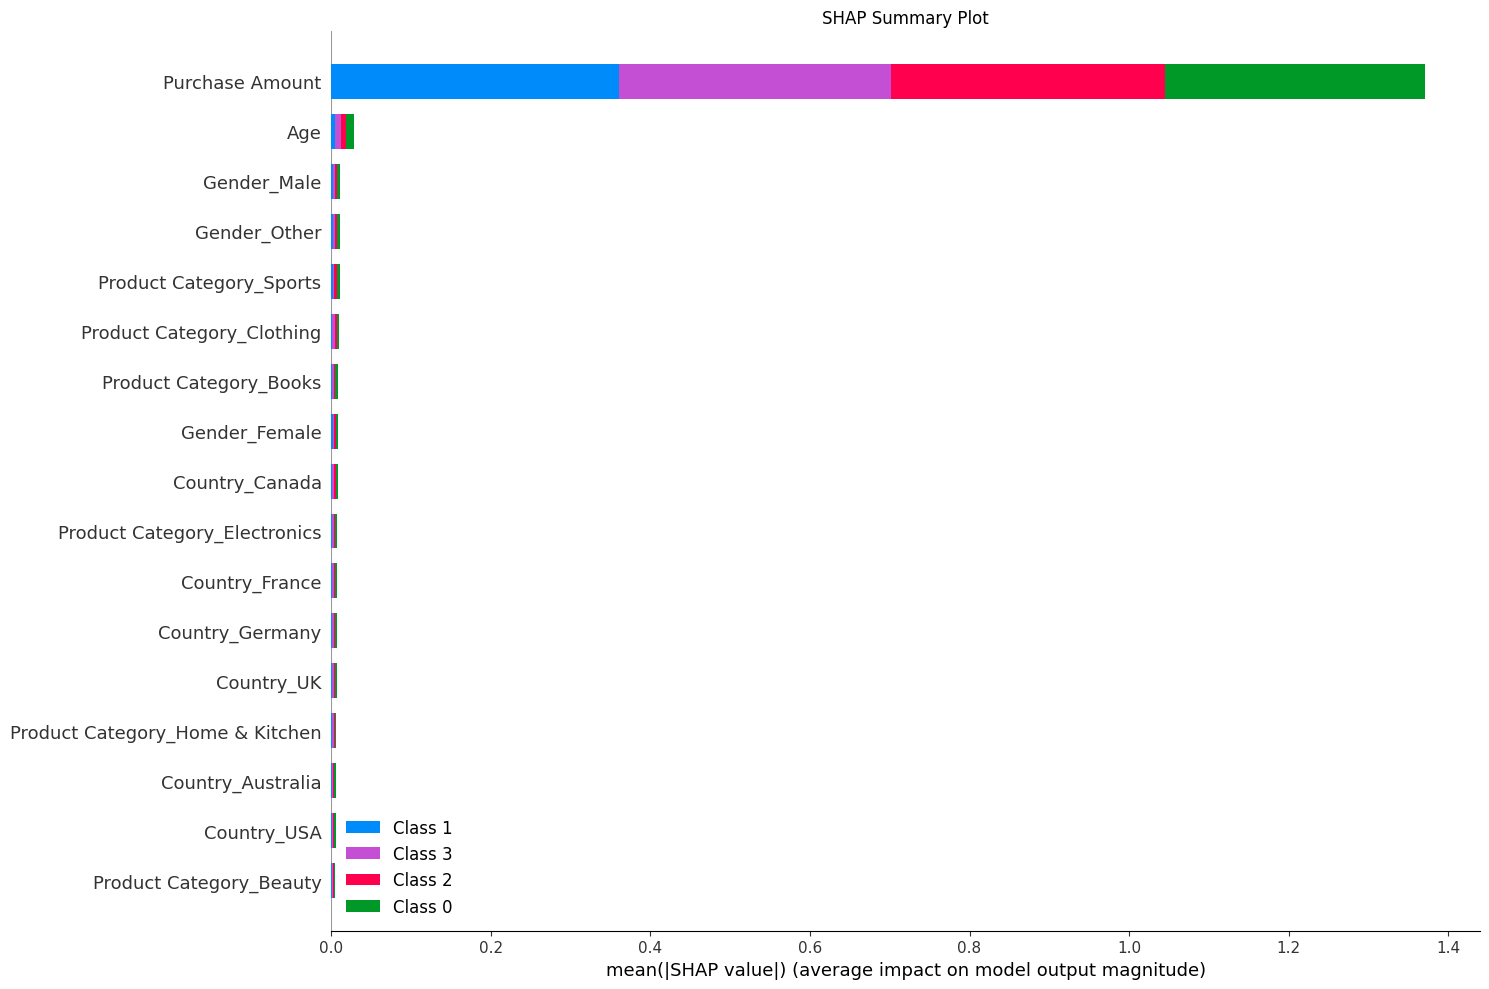

In [4]:
X = models['RF'].X_train
explainer = shap.TreeExplainer(models['RF'].classifier)
shap_values = explainer.shap_values(X)
plt.title("SHAP Summary Plot")
shap.summary_plot(shap_values, X, plot_type="bar", plot_size=(15, 10))

<h3> Saving Results

In [5]:
df_results.to_csv('../../data/(M) classifiers_performance.csv', index=False)